In [1]:
import pandas as pd
import numpy as np
from decision_module import DecisionModuleOnline
import matplotlib.pyplot as plt

In [2]:
online_decision = DecisionModuleOnline()

In [3]:
estimated_score = pd.read_csv("trans_data/eval_out.csv")

In [4]:
n = len(estimated_score)

In [5]:
S = sum(estimated_score['label'])

In [6]:
scores = estimated_score['label'].values
scores.sort()

In [74]:
for drop_ratio in np.arange(0.01, 1, 0.01):
    print(drop_ratio, sum(scores < online_decision.params[drop_ratio]) / n)

0.01 0.00988
0.02 0.019855
0.03 0.029585
0.04 0.03967
0.05 0.049555
0.060000000000000005 0.059515
0.06999999999999999 0.06943
0.08 0.079175
0.09 0.089155
0.09999999999999999 0.099135
0.11 0.109125
0.12 0.118955


KeyboardInterrupt: 

In [7]:
dropped_scores = []
drop_ratios = []
best_scores = []
for drop_ratio in np.arange(0.01, 1, 0.01):
    indicator = (estimated_score['predict'].apply(lambda score, drop_ratio: online_decision.decide(score, drop_ratio), args=[drop_ratio]))
    dropped_ratio = sum(indicator) / n
    drop_ratios.append(dropped_ratio)
    dropped_score = sum(estimated_score[indicator]['label'])
    best_scores.append(sum(scores[:int(n * drop_ratio)]) / S)
    dropped_scores.append(dropped_score / S)
    print("drop ratio {}, drop ratio of our model {:.4f}, dropped score of our model {:.4f}, best {:.4f}".format(drop_ratio, drop_ratios[-1], dropped_scores[-1], best_scores[-1]))

drop ratio 0.01, drop ratio of our model 0.0400, dropped score of our model 0.0405, best 0.0000
drop ratio 0.02, drop ratio of our model 0.0441, dropped score of our model 0.0443, best 0.0001
drop ratio 0.03, drop ratio of our model 0.0488, dropped score of our model 0.0490, best 0.0001
drop ratio 0.04, drop ratio of our model 0.0532, dropped score of our model 0.0536, best 0.0002
drop ratio 0.05, drop ratio of our model 0.0567, dropped score of our model 0.0567, best 0.0003
drop ratio 0.060000000000000005, drop ratio of our model 0.0601, dropped score of our model 0.0600, best 0.0004
drop ratio 0.06999999999999999, drop ratio of our model 0.0644, dropped score of our model 0.0640, best 0.0005
drop ratio 0.08, drop ratio of our model 0.0715, dropped score of our model 0.0713, best 0.0007
drop ratio 0.09, drop ratio of our model 0.0789, dropped score of our model 0.0787, best 0.0009
drop ratio 0.09999999999999999, drop ratio of our model 0.0848, dropped score of our model 0.0843, best 0

drop ratio 0.85, drop ratio of our model 0.8653, dropped score of our model 0.8654, best 0.3777
drop ratio 0.86, drop ratio of our model 0.8720, dropped score of our model 0.8718, best 0.3978
drop ratio 0.87, drop ratio of our model 0.8765, dropped score of our model 0.8763, best 0.4188
drop ratio 0.88, drop ratio of our model 0.8785, dropped score of our model 0.8783, best 0.4408
drop ratio 0.89, drop ratio of our model 0.8906, dropped score of our model 0.8902, best 0.4639
drop ratio 0.9, drop ratio of our model 0.9031, dropped score of our model 0.9025, best 0.4888
drop ratio 0.91, drop ratio of our model 0.9103, dropped score of our model 0.9096, best 0.5155
drop ratio 0.92, drop ratio of our model 0.9227, dropped score of our model 0.9224, best 0.5435
drop ratio 0.93, drop ratio of our model 0.9342, dropped score of our model 0.9337, best 0.5746
drop ratio 0.9400000000000001, drop ratio of our model 0.9409, dropped score of our model 0.9404, best 0.6123
drop ratio 0.95000000000000

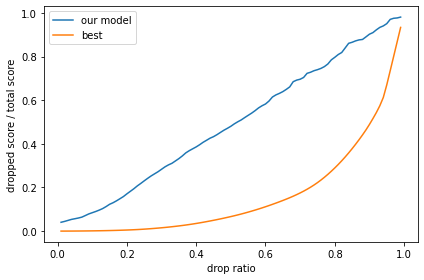

In [8]:
fig, ax = plt.subplots()
ax.plot(np.arange(0.01, 1, 0.01), dropped_scores, label='our model')
ax.plot(np.arange(0.01, 1, 0.01), best_scores, label='best')
ax.set_ylabel("dropped score / total score")
ax.set_xlabel('drop ratio')
ax.legend()
fig.tight_layout()
plt.show()

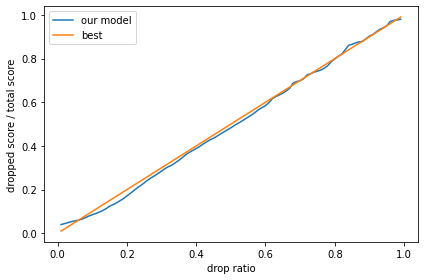

In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(0.01, 1, 0.01), drop_ratios, label='our model')
ax.plot(np.arange(0.01, 1, 0.01), np.arange(0.01, 1, 0.01), label='best')
ax.set_ylabel("dropped score / total score")
ax.set_xlabel('drop ratio')
ax.legend()
fig.tight_layout()
plt.show()

In [66]:
estimated_score['diff'] = estimated_score['predict'] - estimated_score['label']

In [67]:
estimated_score[estimated_score['diff'] < -0.9]

,Unnamed: 0,predict,label,diff
194221,194221,0.073880,0.974642,-0.900762
195452,195452,0.075187,0.975609,-0.900423
195959,195959,0.074477,0.976030,-0.901553
196940,196940,0.075219,0.976826,-0.901606
196951,196951,0.074422,0.976832,-0.902410
...,...,...,...,...
199976,199976,0.092722,0.997491,-0.904769
199983,199983,0.074652,0.997661,-0.923008
199986,199986,0.088813,0.997661,-0.908848
199990,199990,0.089892,0.998575,-0.908684


In [51]:
estimated_score[estimated_score['diff'] < -0.7]

,Unnamed: 0,predict,label,diff
187855,187855,-0.004056,0.697126,-0.701182
187869,187869,0.002193,0.704680,-0.702487
187870,187870,0.000818,0.705044,-0.704226
187872,187872,0.001967,0.705383,-0.703416
187881,187881,0.004297,0.712833,-0.708536
...,...,...,...,...
199995,199995,0.069564,0.999266,-0.929703
199996,199996,0.105329,0.999322,-0.893992
199997,199997,0.035534,0.999344,-0.963810
199998,199998,0.075737,0.999344,-0.923606


In [54]:
estimated_score[estimated_score['label'] > 0.68]

,Unnamed: 0,predict,label,diff
187817,187817,0.917747,0.680719,0.237028
187818,187818,0.026674,0.681046,-0.654372
187819,187819,0.004297,0.681318,-0.677021
187820,187820,0.330293,0.681549,-0.351256
187821,187821,0.191679,0.683612,-0.491933
...,...,...,...,...
199995,199995,0.069564,0.999266,-0.929703
199996,199996,0.105329,0.999322,-0.893992
199997,199997,0.035534,0.999344,-0.963810
199998,199998,0.075737,0.999344,-0.923606


In [56]:
estimated_score.sort_values(by='diff')

,Unnamed: 0,predict,label,diff
199863,199863,-0.018662,0.993154,-1.011817
199919,199919,-0.016019,0.995777,-1.011796
199966,199966,-0.013374,0.997010,-1.010384
199797,199797,-0.018520,0.989812,-1.008333
199950,199950,-0.010727,0.996704,-1.007431
...,...,...,...,...
20578,20578,0.946460,0.003381,0.943080
27022,27022,0.947987,0.004629,0.943358
24346,24346,0.947716,0.004038,0.943678
4399,4399,0.945426,0.000752,0.944674


### plot

Text(0, 0.5, 'score loss ratio')

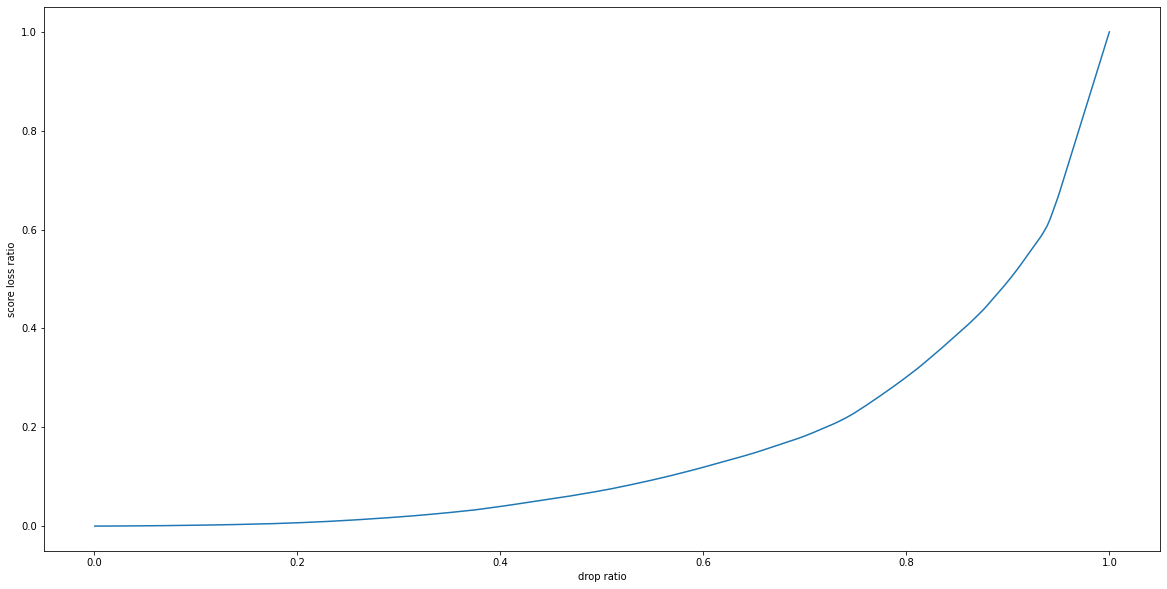

In [11]:
import matplotlib.pyplot as plt

df = pd.read_csv('./source.post.csv')
df1 = df.groupby('column_1').mean()#.sort_values(by='score')
df2 = df.groupby('column_1').count()[['column_2']].rename(columns={'column_2':'cnt'})

sub_df = pd.concat([df1, df2], axis='columns').sort_values(by='score')
cnt_sum = sum(sub_df['cnt'])
score_sum = sum(sub_df['score'] * sub_df['cnt'])
sub_df['cusum'] = sub_df['cnt'].cumsum()
sub_df['score_cusum'] = (sub_df['score'] * sub_df['cnt']).cumsum()
sub_df['quantile'] = sub_df['cusum'] / cnt_sum
sub_df['score_quantile'] = sub_df['score_cusum'] / score_sum

plt.figure(figsize=(20, 10))
plt.plot(sub_df['quantile'].values, sub_df['score_quantile'].values)
plt.xlabel('drop ratio')
plt.ylabel('score loss ratio')

In [12]:
sub_df

,score,cnt,cusum,score_cusum,quantile,score_quantile
column_1,,,,,,
dbd3752f739324f89953929a97acb8c6,0.000221,519,519,0.114795,0.000519,7.787658e-07
71d6cf21485cc7bd030e162cf934b4b9,0.000305,2120,2639,0.761028,0.002639,5.162785e-06
31f496701ca5fb0f67e685f057f9153d,0.000731,1239,3878,1.666157,0.003878,1.130314e-05
d3dc59ccde676ec616219b54e9038df5,0.000928,601,4479,2.223661,0.004479,1.508523e-05
9e3389ab457d2dedfe97b4594d5c7e2b,0.000958,630,5109,2.827108,0.005109,1.917900e-05
...,...,...,...,...,...,...
a9fbc79ffb23bbd12ad5d233067a4ab2,0.943232,606,951130,99750.540600,0.951130,6.767039e-01
62e461517d779488c649f6d735bc7bbe,0.961760,700,951830,100423.772925,0.951830,6.812711e-01
2fe45d099039cfa9c4453ed4050cd762,0.974143,43371,995201,142673.319210,0.995201,9.678905e-01


In [20]:
cnt_cusum_dict = {}
for index, series in sub_df.iterrows():
    cnt_cusum_dict[index] = series['quantile']

json_str = json.dumps(cnt_cusum_dict, indent=4)
with open('cnt_cusum_dict.json', 'w') as json_file:
    json_file.write(json_str)

In [21]:
len(cnt_cusum_dict)

500

In [19]:
cnt_cusum_dict

{'dbd3752f739324f89953929a97acb8c6': 0.000519,
 '71d6cf21485cc7bd030e162cf934b4b9': 0.002639,
 '31f496701ca5fb0f67e685f057f9153d': 0.003878,
 'd3dc59ccde676ec616219b54e9038df5': 0.004479,
 '9e3389ab457d2dedfe97b4594d5c7e2b': 0.005109,
 'ccb802873f0947780da1e35bf325d1c7': 0.005659,
 'd669f8fa95f68583fb11a14707324736': 0.006259,
 '64e900a36c26bc79be70dd2fdecfeed6': 0.007489,
 '990743887f08933663007449b8b7dc63': 0.008038,
 '25f795ceadb7ce421f0670f44ecd65cd': 0.008614,
 '0e4320499c99f15048beda30d11acc9f': 0.009103,
 '69d3f99a5d82d08bf76f2507a18b7377': 0.009757,
 'f0cf46ddac7273c9a9b838d09c19b599': 0.011867,
 '8471a74f40cc2793ca797c7c61dc43cd': 0.012549,
 '7a25d776f7693298501ee815de106c0e': 0.01304,
 '6bc73fb51904bd0650b7497ced8af34f': 0.014043,
 'b93bae2e012f8b9fc5b7ace995e85b9e': 0.014967,
 '26885193ab7039e20a5c3b375817ba8e': 0.015439,
 '2910dd8b89cfe27b1270612fc6d8d919': 0.020361,
 '14ee3f3d374eab8c448a0e52041e71d4': 0.021007,
 '913252c04222c03e16fd32832cb17587': 0.022188,
 '116282cb8485